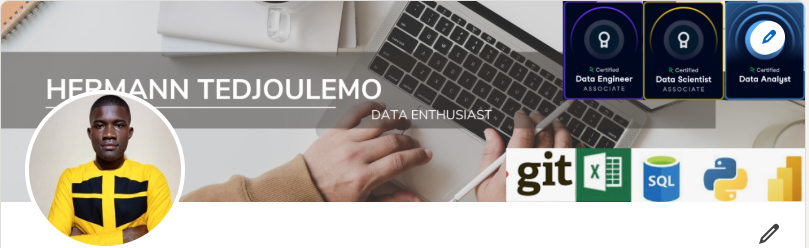

### PROJET DE L'OPTIMISATION DE LA GESTION DES DONNEES D'UNE BOUTIQUE : Analyse exploratoire

### OBJECTIFS : Faire le rapprochement entre deux jeux de données, étudier les erreurs de saisie dans certains   prix des produits, calculer le chiffre d'affaire total et le chiffre d'affaire par produit.

### SOMMAIRE

####  <a href='#resume'>1. RESUME DE L'ANALYSE </a>
#### <a href='#forme'>2. ANALYSE DE LA FORME </a>
#### <a href='#fond'>3. ANALYSE DU FOND </a> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

####  <a id='resume'>1. RESUME DE L'ANALYSE <a>

### a-ANALYSE DE FORME

- Le dataframe de l'ERP :   
   - Nombre de colonne : 5, nombre de ligne : 825.  
   - Nom et type de colonnes : product_id : int64, onsale_web : int64, price : float64, stock_quantity : int64 stock_status : String.  
   - Ce dataframe ne contient pas de valeur NaN ni de doublons.  
  
- Le dataframe du fichier excel de sylvie : 
    - Nombre de colonne : 2, nombre de ligne : 825.
    - Nom et type de colonnes :  	product_id : int64, id_web : String.
    - La colonne id_web est contituée a 11% de la valeur NaN.    
- Le dataframe de l'outil CMS (base de donnée en ligne):
    - Nombre de colonne : 2, nombre de ligne : 1513.
    - Il contient beaucoup de valeur NaN, et les colonnes 'tax_class','post_content','post_password', 'post_content_filtered' ne contiennent que des valeurs NaN. On les a supprimé puisq'elles sont inutiles.  
    -La colonne sku est contitué à 5,61% de valeur NaN, on les a supprimé entierement. Cette colonne est contitué également à 50% de doublons.
    
### b-ANALYSE DE FOND
- Le chiffre d'affaire total est de : 70568.6 USD
-Nombre de vente est de : 2865.0 ventes
- Le chiffre d'affaire par produit : <a href='#chiffre'> Chiffre d'affaire par produit </a> 
-Tous les prix dans ce dataframe existent sur le marché donc les valeurs extrmes contenu dans ce dataframe sont des valeurs atypiques
- Liste des  valeurs atypiques : : 225.0 ; 126.5 ; 176.0 ; 157.0 ; 137.0 ; 217.5 ; 124.8 ; 175.0 ; 191.3 ; 122.0 ; 135.0 ; 116.4 ; 121.0 ; 121.0, 100.0 ; 88.4 ;  83.0 ; 85.6 ; 108.5 ;  104.0 ; 109.6 ; 102.3 ; 105.0 ; 105.0 ; 112.0   86.8 ; 92.0 ; 83.7 ; 93.0 ; 114.0 ; 105.6 ; 99.0.
- Pour la recherche des Outliers Nous remarquons qu'apartir de 116 dollars (3,92% des données D'apres la methode z_score) les données des prix ne sont plus homogènes ceci peut être dû  aux erreurs de saisi. 
-Le nombres de ventes pour les valeurs atypiques: 45.0
-ces valeurs atypiques représentent 5.76 % du chiffre d'affaire total
-Le pourcentage de vente pour ces valeurs est de : 1.57 %
-Donc on peut arreter la vente de ces articles ou les placer comme des articles premium. 

####  <a id='forme'>2. ANALYSE DE LA FORME <a>

#### a-Analyse de l'exports des produits commercialisés en ligne

In [3]:
data_ligne=pd.read_excel('web.xlsx')
data_ligne.head(5)
#print(data_ligne)

C:\Users\HERMANN\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [4]:
#liste_colonne=['tax_class','post_content','post_password','post_content_filtered','post_mime_type']
#for i in liste_colonne :
#    nombre_ligne=data_ligne[liste_colonne].isna().sum() 
#    print(nombre_ligne)

In [5]:
data_ligne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

- Nous remarquons que les colonnes 'tax_class','post_content','post_password','post_content_filtered' ne contiennent que des valeurs NaN. On va donc les supprimer dans la suite.
    
- Visualisons les proportions de type de variable

<AxesSubplot:ylabel='None'>

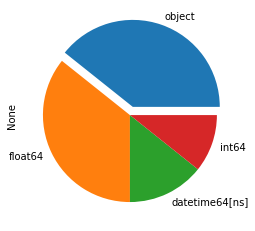

In [6]:
explode=[0.1,0,0,0]
data_ligne.dtypes.value_counts().plot.pie(explode=explode)

- Nous allons supprimer les colonnes qui sont constitués a 100% de valeurs NaN

In [7]:
data_ligne.drop(['tax_class','post_content','post_password','post_content_filtered'],axis=1,inplace=True)

In [8]:
data_ligne.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
data_ligne.isna().sum()

sku                   85
virtual                0
downloadable           0
rating_count           0
average_rating        83
total_sales           83
tax_status           797
post_author           83
post_date             83
post_date_gmt         83
post_title            83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified         83
post_modified_gmt     83
post_parent           83
guid                  83
menu_order            83
post_type             83
post_mime_type       799
comment_count         83
dtype: int64

- Visualisons la repartition des valeurs NaN dans notre dataframe

<AxesSubplot:>

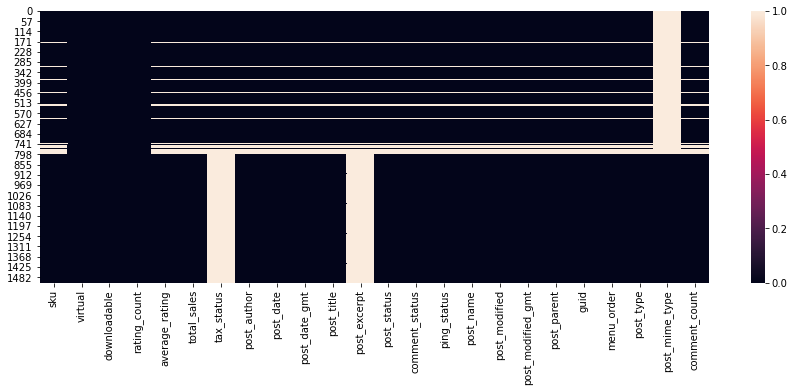

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(data_ligne.isna())

- Analysons les lignes dont la colonnes 'sku' contient que des valeurs NaN

In [11]:
table_erreur=data_ligne[data_ligne['sku'].isna()]
table_erreur.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


- On constate que ces lignes sont inutiles puiqu'elles ne contiennent que des valeur NaN, on va donc les supprimer dans le dataframe de départ

In [12]:
data_ligne.drop(table_erreur.index,inplace=True)
data_ligne.reset_index(drop=True,inplace=True)
data_ligne.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [13]:
data_ligne.shape

(1428, 24)

- Vérifions s'il ya des doublons

In [14]:
data_ligne['sku'].duplicated().value_counts()

False    714
True     714
Name: sku, dtype: int64

In [15]:
data_ligne.drop_duplicates(subset='sku',keep='first',inplace=True,)

In [16]:
data_ligne.shape

(714, 24)

#### b-Analyse de l'exports de L'ERP 

In [17]:
data_erp=pd.read_excel('erp.xlsx')

C:\Users\HERMANN\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [18]:
data_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [19]:
data_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [20]:
data_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

- On remarque qu'ici l'export erp ne contient pas de valeur NaN

In [21]:
data_erp['product_id'].duplicated().value_counts()

False    825
Name: product_id, dtype: int64

### c-Analyse du fichier de Sylvie

In [22]:
data_sylvie=pd.read_excel('liaison.xlsx')

C:\Users\HERMANN\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [23]:
data_sylvie.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [24]:
data_sylvie.columns=['product_id','sku']

In [25]:
data_sylvie.head(5)

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [26]:
data_sylvie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [27]:
data_sylvie.isna().sum()

product_id     0
sku           91
dtype: int64

- Nous remarqueons que la colonne product_id ne contient aucune valeur NaN par contre la colonne id_web contient 91 lignes avec des valeurs NaN

In [28]:
data_sylvie['product_id'].duplicated().value_counts()

False    825
Name: product_id, dtype: int64

In [29]:
data_sylvie['sku'].duplicated().value_counts()

False    735
True      90
Name: sku, dtype: int64

In [30]:
data_sylvie.drop_duplicates(subset='sku',keep='first',inplace=True)

In [31]:
data_sylvie.shape

(735, 2)

In [32]:
data_sylvie.isna().sum()

product_id    0
sku           1
dtype: int64

In [33]:
data_sylvie.dropna(inplace=True)

In [34]:
data_sylvie.shape

(734, 2)

#### <a  id ='fond'>3. ANALYSE DU FOND <a> 
### a-Réalisons la jointure des deux exports (de la base de données en ligne et la base de l'ERP)
    On réalise la jointure de l'export de l'erp et la tble de jointure de sylvie.

In [35]:
data_group1=pd.merge(data_erp,data_sylvie,how='inner')
data_group1.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


Réalisons la jointure de la table obtenue et de l'export en ligne

In [36]:
data_group2=pd.merge(data_group1,data_ligne,how='inner')
data_group2.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [37]:
data_group2['sku'].duplicated().value_counts()

False    714
Name: sku, dtype: int64

In [38]:
data_group2['product_id'].duplicated().value_counts()

False    714
Name: product_id, dtype: int64

### b-Calculons le chiffre d'affaire Total 
On crée d'abord une colonne chiffre d'affaire qui calcule le montant total des ventes en faisant le produit du nombre total des ventes  avec le prix du produit correspondant

In [39]:
data_group2.insert(29,'chiffre_daffaire',data_group2['price']*data_group2['total_sales'])
data_group2.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,chiffre_daffaire
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [40]:
chiffre_daffaire=data_group2['chiffre_daffaire'].sum()
print('le chiffre d\'affaire est de :',chiffre_daffaire,'USD')
print('Nombre de vente est de :',data_group2['total_sales'].sum(),'ventes')

le chiffre d'affaire est de : 70568.6 USD
Nombre de vente est de : 2865.0 ventes


### C-Déterminons le chiffre d'affaire par produit
####  <a id='chiffre'>Chiffre d'affaire <a>
##### On utilise ici une table qui contient les id des produit suivi de son chiffre d'affaire

In [41]:
data_group2.groupby(['product_id'])['chiffre_daffaire']

0       145.2
1         0.0
2         0.0
3        42.3
4         0.0
5         0.0
6         0.0
7       218.4
8       180.0
9       596.4
10      480.0
11        0.0
12      159.6
13       19.3
14      130.8
15       46.2
16      202.2
17     1018.9
18      716.0
19      127.0
20      156.6
21       95.7
22       60.9
23      107.1
24       35.7
25       43.5
26       43.2
27        0.0
28      416.0
29      418.0
30     1029.2
31        0.0
32      163.8
33      630.8
34       32.0
35        0.0
36       50.8
37        0.0
38       56.2
39        0.0
40      440.0
41        0.0
42      156.0
43        0.0
44        0.0
45      133.0
46       65.6
47      259.2
48        0.0
49       50.4
50        0.0
51       12.8
52       22.1
53        0.0
54        0.0
55        0.0
56       16.3
57      195.6
58      116.4
59       34.0
60       75.6
61        0.0
62       63.4
63        0.0
64        0.0
65        0.0
66        0.0
67      154.2
68        0.0
69     1560.0
70     1590.0
71    

Visualisons les 20 produits ayant le plus gros chiffre d'affaire

Text(0.5, 1.0, "Chiffre d'affaire des produits")

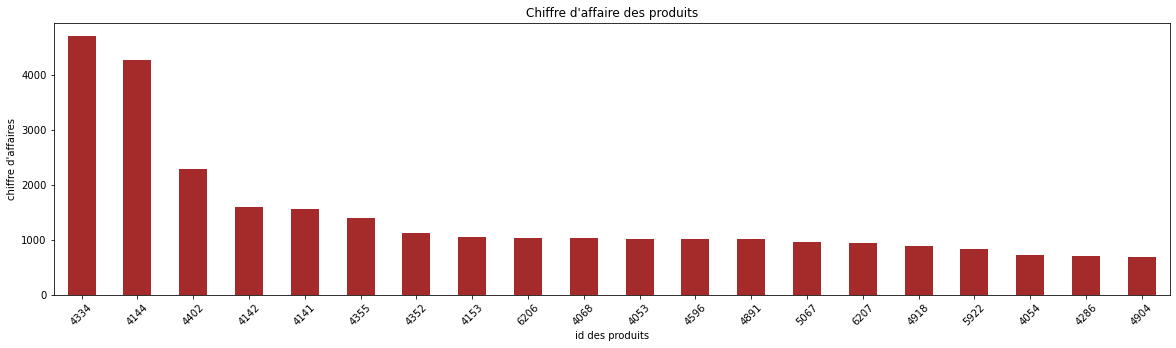

In [42]:
plt.figure(figsize=(20,5))
data_group2.groupby(['product_id'])['chiffre_daffaire'].first().sort_values(ascending=False).head(20).plot.bar(color='brown')
plt.xticks(rotation=45);
plt.xlabel('id des produits')
plt.ylabel('chiffre d\'affaires')
plt.title('Chiffre d\'affaire des produits')

Visualisons les tendances avec les 20 produits les plus vendus

Text(0.5, 1.0, 'Observation des tendances de ventes')

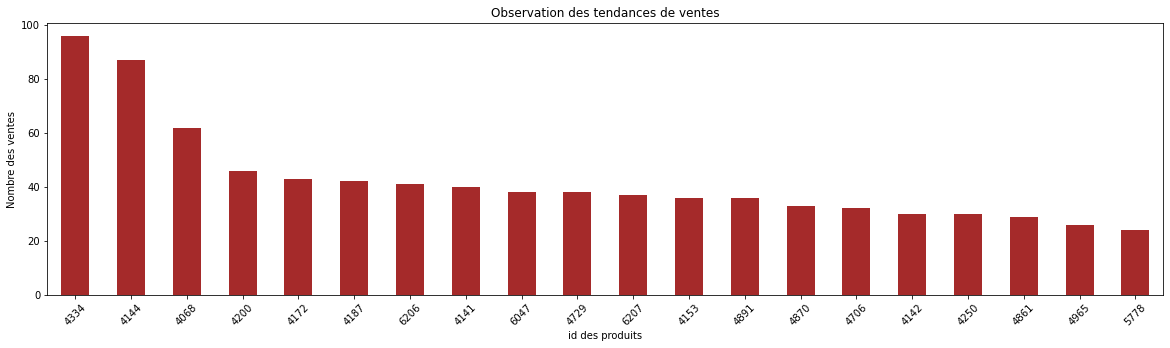

In [43]:
plt.figure(figsize=(20,5))
data_group2.groupby(['product_id'])['total_sales'].first().sort_values(ascending=False).head(20).plot.bar(color='brown')
plt.xticks(rotation=45)
plt.xlabel('id des produits')
plt.ylabel('Nombre des ventes')
plt.title('Observation des tendances de ventes')

 ### d-Déterminons les valeurs aberrantes et faire une représentation graphique

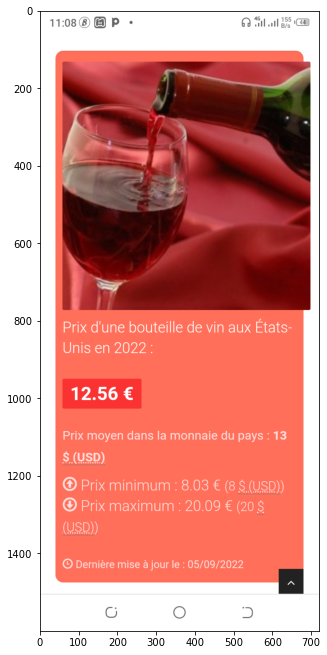

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,20))
image=Image.open("photo.png","r")
plt.imshow(np.array(image))

Visualisons à l'aide d'un graphe l'existence des valeurs aberrantes

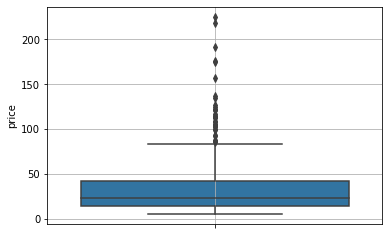

In [45]:
sns.boxplot(data=data_group2,y='price')
plt.grid()

Conclusion : On remarque l'existence des valeurs qui s'écartent de la valeur moyenne, ces valeurs peuvent etres des erreurs de saisi ou simplement des valeurs extremes.

Nous allons Lister ces valeurs aberrantes ou atypiques:  
##### 1ere Approche : en utlisant le visuel boxplot

In [46]:
data_aberante=data_group2[data_group2['price']>83]
print(data_aberante['price'])

63     100.0
65      88.4
199    225.0
201    126.5
205     85.6
218    176.0
219    108.5
221    157.0
222    104.0
227    109.6
380    102.3
381    137.0
426    217.5
431    105.0
432    105.0
437    112.0
438     86.8
502     92.0
506     83.7
511    124.8
553    175.0
587    191.3
602     93.0
603    122.0
604    114.0
642    135.0
647    105.6
648    116.4
653    115.0
654    121.0
655     99.0
656    115.0
657    121.0
Name: price, dtype: float64


In [47]:
#plt.figure(figsize=(10,5))
#sns.histplot(data=data_aberante,x='price',color='red',bins=50)
#plt.hist(data_aberante['price'],color='orange')

##### 2ème Approche : En définissant le porcentage des données qui représentent les valeurs aberrantes

In [48]:
tolerence=data_group2['price'].quantile(.95)

In [49]:
#data_aberante=data_group2[data_group2['price']>tolerence]
#data_aberante.head(72)

In [50]:
print(data_aberante['price'])

63     100.0
65      88.4
199    225.0
201    126.5
205     85.6
218    176.0
219    108.5
221    157.0
222    104.0
227    109.6
380    102.3
381    137.0
426    217.5
431    105.0
432    105.0
437    112.0
438     86.8
502     92.0
506     83.7
511    124.8
553    175.0
587    191.3
602     93.0
603    122.0
604    114.0
642    135.0
647    105.6
648    116.4
653    115.0
654    121.0
655     99.0
656    115.0
657    121.0
Name: price, dtype: float64


In [51]:
#plt.figure(figsize=(10,5))
#sns.histplot(data=data_aberante,x='price',color='red',bins=50)
#plt.hist(data_aberante['price'],color='olivedrab')

##### Autre Approche : En Utilisant la distance interquartile

In [52]:
# Compute the first and third quantiles and IQR
q1 = np.quantile(data_group2['price'], 0.25)
q3 = np.quantile(data_group2['price'], 0.75)
iqr = q3 - q1
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
# Subset  to find outliers
outliers = data_group2[(data_group2['price'] < lower) | (data_group2['price'] > upper)]['price']
print(outliers)


63     100.0
65      88.4
199    225.0
201    126.5
205     85.6
218    176.0
219    108.5
221    157.0
222    104.0
227    109.6
380    102.3
381    137.0
426    217.5
431    105.0
432    105.0
437    112.0
438     86.8
502     92.0
511    124.8
553    175.0
587    191.3
602     93.0
603    122.0
604    114.0
642    135.0
647    105.6
648    116.4
653    115.0
654    121.0
655     99.0
656    115.0
657    121.0
Name: price, dtype: float64


##### 3ème Approche : Utilisation de la méthode Z_score

In [53]:
outliers=[]
def detect_outliers(data):
    mean=np.mean(data)
    std=np.std(data)
    for i in data : 
        z_score=(i-mean)/std
        if np.abs(z_score)>3 :
            outliers.append(i)
    return outliers

In [54]:
table=detect_outliers(data_group2['price'])
print(table)

[225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 135.0, 116.4, 121.0, 121.0]


In [55]:
len(detect_outliers(data_group2['price']))

28

(array([18.,  6.,  0.,  3.,  0.,  6.,  3.,  0.,  0.,  6.]),
 array([116.4 , 127.26, 138.12, 148.98, 159.84, 170.7 , 181.56, 192.42,
        203.28, 214.14, 225.  ]),
 <BarContainer object of 10 artists>)

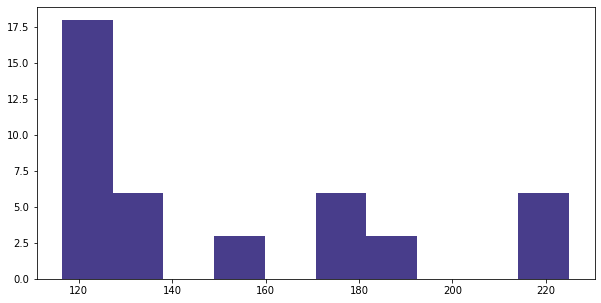

In [56]:
plt.figure(figsize=(10,5))
#sns.histplot(data=data_aberante,x='price',color='red',bins=50)
plt.hist(detect_outliers(data_group2['price']),color='darkslateblue')

In [57]:
data_aberante=data_group2[(data_group2['price']>80)&(data_group2['price']<115)]
print(data_aberante['price'])

63     100.0
65      88.4
196     83.0
205     85.6
219    108.5
222    104.0
227    109.6
380    102.3
431    105.0
432    105.0
437    112.0
438     86.8
502     92.0
506     83.7
602     93.0
604    114.0
647    105.6
655     99.0
Name: price, dtype: float64


##### 4ème Approche : Utilisation de la detection d'anomalie

C:\Users\HERMANN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


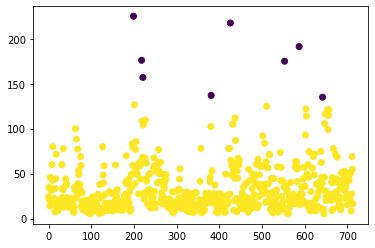

In [58]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination=0.01)

x=pd.DataFrame()
x['abs']=data_group2['price'].index
x['prix']=data_group2['price']

model.fit(x)
plt.scatter(x['abs'],x['prix'],c=model.predict(x))

In [59]:
print(model.predict(x))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

### Déterminons le poid des valeurs atypiques sur le chiffre d'affaire

In [60]:
print('ces valeurs atypique représentent',(data_aberante['price'].sum()/data_group2['chiffre_daffaire'].sum())*100,'% du chiffre d\'affaire total')

ces valeurs atypique représentent 2.5188256533359024 % du chiffre d'affaire total


In [61]:
print('Le nombres de ventes pour les valeurs atypiques:',data_aberante['total_sales'].sum())

Le nombres de ventes pour les valeurs atypiques: 4.0


In [62]:
print('Le pourcentage de vente pour ces valeurs est de :',(data_aberante['total_sales'].sum()/data_group2['total_sales'].sum())*100,'%')

Le pourcentage de vente pour ces valeurs est de : 0.13961605584642234 %
